## Neural Nets Implementation & XOR Problem

**Goal:** The goal of this exercise is to implement a small neural network from scratch and train it using backprop.

In [9]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [10]:
# Load xor toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train'] # 800 training data points with 2 features
y_train = data['y_train'] # training binary labels {0,1}

X_test = data['X_test']
y_test = data['y_test']


In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


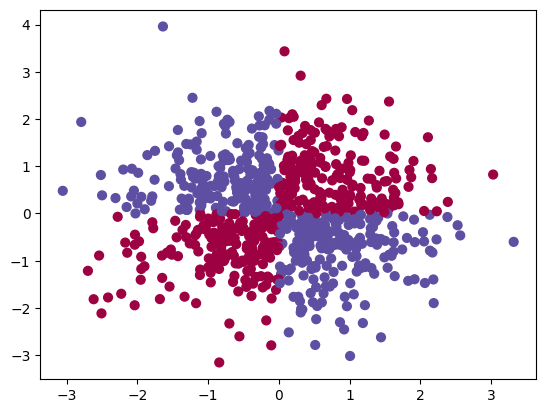

In [12]:
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)

**In this exercise, do the following:**
1. Implement brackprop to train a two-layer perceptron: an input layer, a hidden layer, and an output layer.
2. The core of the code should include: a forward pass, a backward pass, and weight updates.
3. For input and output layers specify the number of nodes appropriate for the above problem.
4. Randomly initialize the weights and biases of the network.
5. For the hidden layer use ReLU as an activation function and for the output layer use logistic sigmoid.
6. Use cross-entropy loss as the network's loss function and mini-batch SGD as the optimizer.
7. Use cross-validation to estimate performance.
8. Tune the network as you see fit (including number of units in the hidden layer, learning rate,  batch size, number of epochs, etc).
9. Provide a classification report of the performance on the train and test set.
10. Write a summary. Make sure you document your code well.
  
(Optional) You can use sklearn.inspection.DecisionBoundaryDisplay to visualize your decision boundary.

Training on Fold 1/5...
Epoch 0, Loss: 0.6930782429778743
Epoch 100, Loss: 0.6906902646490664
Epoch 200, Loss: 0.6529688966074866
Epoch 300, Loss: 0.4605940540053596
Epoch 400, Loss: 0.2586019065695344
Epoch 500, Loss: 0.17775510198642278
Epoch 600, Loss: 0.14088006865096375
Epoch 700, Loss: 0.11960550594817451
Epoch 800, Loss: 0.10554797100448039
Epoch 900, Loss: 0.09547195192010588


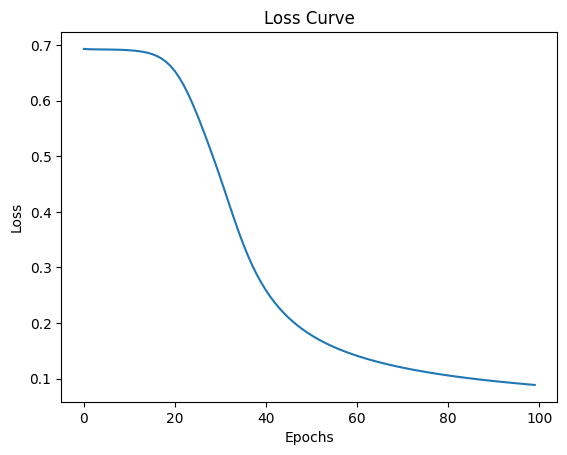

Fold 1 Accuracy: 0.9625
Training on Fold 2/5...
Epoch 0, Loss: 0.6931078026205955
Epoch 100, Loss: 0.6910810787141646
Epoch 200, Loss: 0.6543617364843171
Epoch 300, Loss: 0.43123000453688914
Epoch 400, Loss: 0.24513363172858318
Epoch 500, Loss: 0.17606260384595326
Epoch 600, Loss: 0.1422734672317696
Epoch 700, Loss: 0.12199045040726256
Epoch 800, Loss: 0.10828586830782405
Epoch 900, Loss: 0.09829971523771572


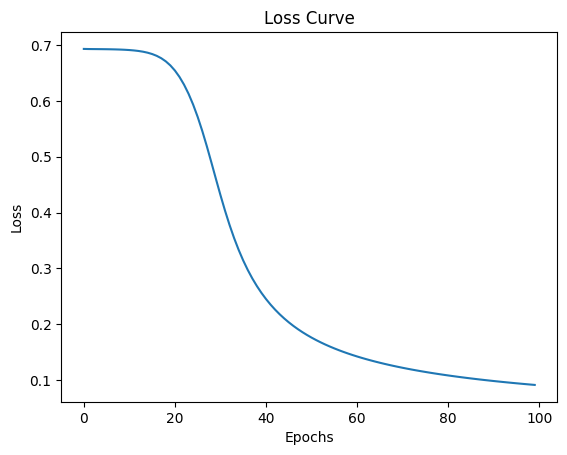

Fold 2 Accuracy: 0.98125
Training on Fold 3/5...
Epoch 0, Loss: 0.6930813023991229
Epoch 100, Loss: 0.6914641522338284
Epoch 200, Loss: 0.6651245155608793
Epoch 300, Loss: 0.5322272750549581
Epoch 400, Loss: 0.3860827888788255
Epoch 500, Loss: 0.29538333873213896
Epoch 600, Loss: 0.24268940802072309
Epoch 700, Loss: 0.20917214999219746
Epoch 800, Loss: 0.1858680540503934
Epoch 900, Loss: 0.1688370363554807


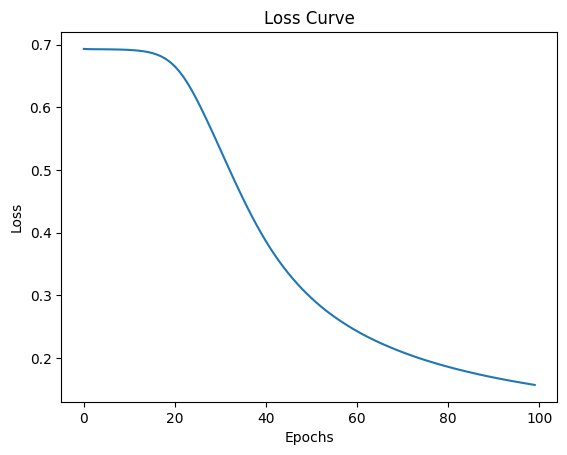

Fold 3 Accuracy: 0.90625
Training on Fold 4/5...
Epoch 0, Loss: 0.6931099100535002
Epoch 100, Loss: 0.690979773306247
Epoch 200, Loss: 0.6583520406041973
Epoch 300, Loss: 0.45865609319941764
Epoch 400, Loss: 0.24845901470919718
Epoch 500, Loss: 0.1706752381217219
Epoch 600, Loss: 0.13465558157468135
Epoch 700, Loss: 0.11368389667923195
Epoch 800, Loss: 0.0997741475703085
Epoch 900, Loss: 0.0897867774584929


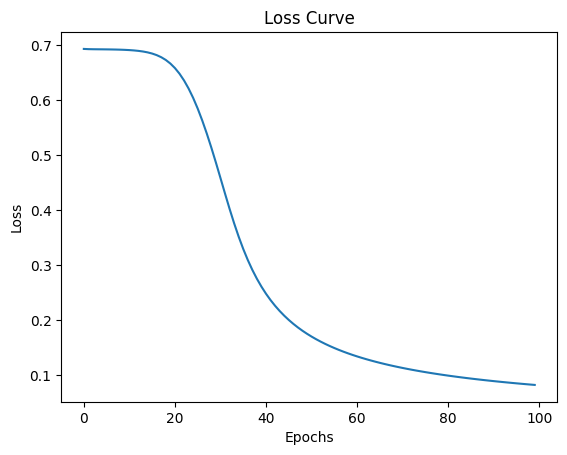

Fold 4 Accuracy: 0.96875
Training on Fold 5/5...
Epoch 0, Loss: 0.6931139908936986
Epoch 100, Loss: 0.6905975574245459
Epoch 200, Loss: 0.6497620708088316
Epoch 300, Loss: 0.420168642836828
Epoch 400, Loss: 0.23596382582911785
Epoch 500, Loss: 0.16928326686167977
Epoch 600, Loss: 0.13686235034535033
Epoch 700, Loss: 0.11744672712721649
Epoch 800, Loss: 0.10433253613776046
Epoch 900, Loss: 0.09475400632711846


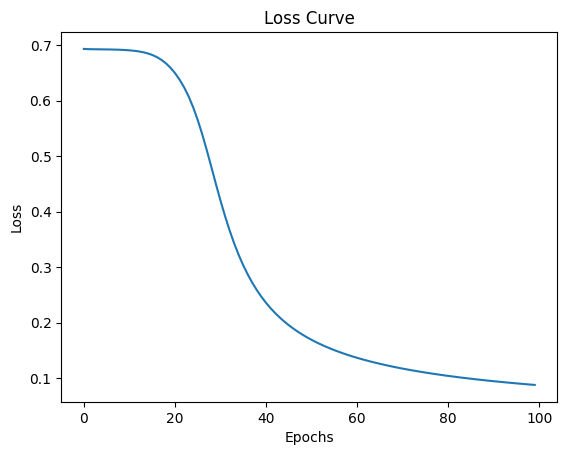

Fold 5 Accuracy: 0.99375

Average Cross-Validation Accuracy: 0.9625
Epoch 0, Loss: 0.693089822781129
Epoch 100, Loss: 0.6903052752000207
Epoch 200, Loss: 0.6156651421077453
Epoch 300, Loss: 0.3409839097494553
Epoch 400, Loss: 0.19196351325758987
Epoch 500, Loss: 0.14121152464859277
Epoch 600, Loss: 0.1159017406933447
Epoch 700, Loss: 0.10042236329736376
Epoch 800, Loss: 0.08979474203588729
Epoch 900, Loss: 0.08196355090276673


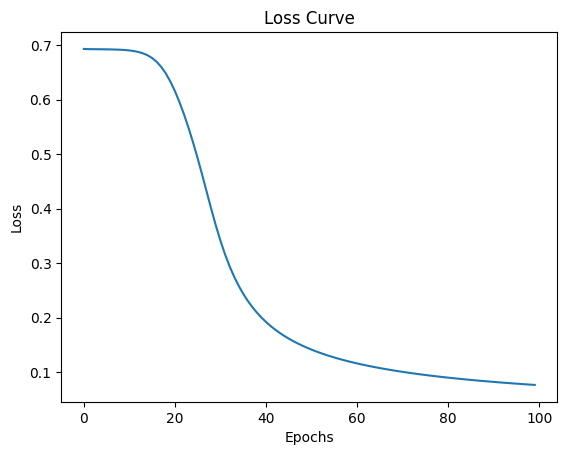


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold

# Load XOR toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# Sigmoid and ReLU activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Initialize weights and biases
def initialize_weights(input_dim, hidden_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * 0.01
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

# Forward pass
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Backward pass
def backward_propagation(X, y, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate):
    m = X.shape[0]
    
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    dZ2 = A2 - y  # Shape (batch_size, output_dim)
    dW2 = np.dot(A1.T, dZ2) / m  # Shape (hidden_dim, output_dim)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # Shape (1, output_dim)
    
    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)  # Shape (batch_size, hidden_dim)
    dW1 = np.dot(X.T, dZ1) / m  # Shape (input_dim, hidden_dim)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # Shape (1, hidden_dim)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return W1, b1, W2, b2

# Compute loss
def compute_loss(y, A2):
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    return -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))

# Plot loss curve
def plot_loss_curve(losses):
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()

# Training function
def train(X, y, input_dim, hidden_dim, output_dim, epochs, learning_rate, batch_size):
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)
    losses = []
    for epoch in range(epochs):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
        
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]
            Z1, A1, Z2, A2 = forward_propagation(X_batch, W1, b1, W2, b2)
            W1, b1, W2, b2 = backward_propagation(X_batch, y_batch, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate)
        
        if epoch % 10 == 0:
            _, _, _, A2_train = forward_propagation(X, W1, b1, W2, b2)
            loss = compute_loss(y, A2_train)
            losses.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
    
    plot_loss_curve(losses)
    return W1, b1, W2, b2

# Prediction function
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

# Train with Cross-Validation
def train_with_cross_validation(X, y, input_dim, hidden_dim, output_dim, epochs, learning_rate, batch_size, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    fold = 1
    fold_accuracies = []
    all_reports = []

    for train_index, val_index in kf.split(X):
        print(f"Training on Fold {fold}/{k_folds}...")
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        W1, b1, W2, b2 = train(X_train_fold, y_train_fold, input_dim, hidden_dim, output_dim, epochs, learning_rate, batch_size)
        
        y_pred_val = predict(X_val_fold, W1, b1, W2, b2)
        accuracy = accuracy_score(y_val_fold, y_pred_val)
        fold_accuracies.append(accuracy)
        
        report = classification_report(y_val_fold, y_pred_val, output_dict=True)
        all_reports.append(report)

        print(f"Fold {fold} Accuracy: {accuracy}")
        fold += 1

    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Cross-Validation Accuracy: {avg_accuracy:.4f}")
    return avg_accuracy, all_reports

# Hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
epochs = 1000
learning_rate = 0.01
batch_size = 32
k_folds = 5

# Perform cross-validation
avg_accuracy, reports = train_with_cross_validation(
    np.array(X_train), np.array(y_train),
    input_dim, hidden_dim, output_dim,
    epochs, learning_rate, batch_size, k_folds
)

# Evaluate on the test set
W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)  # Retrain final model
W1, b1, W2, b2 = train(X_train, y_train, input_dim, hidden_dim, output_dim, epochs, learning_rate, batch_size)
y_pred_test = predict(X_test, W1, b1, W2, b2)
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))